Our problem is an image recognition problem, to identify digits from a given 28 x 28 image. We have a subset of images for training and the rest for testing our model.

So first, download the train and test files. The dataset contains a zipped file of all the images and both the train.csv and test.csv have the name of corresponding train and test images. Any additional features are not provided in the datasets, just the raw images are provided in ‘.png’ format.

In [1]:
# Import all the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

# Define transform

As part of the loading process, we can apply multiple transformations (reshape, convert to tensor, normalize, etc.) to the incoming data.
For this exercise we only need to convert images to tensors.

In [2]:
transform = transforms.ToTensor()

PyTorch makes the MNIST dataset available through torchvision. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

## Load the Training Set

In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data

100.1%

Extracting ../Data\MNIST\raw\train-images-idx3-ubyte.gz


113.5%

Extracting ../Data\MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting ../Data\MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting ../Data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

## Load the test set

There's a companion set of MNIST data containing 10,000 records accessible by setting train=False. As before, torchvision will only download this once, and in the future will look for the local copy

In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

## Examin the first record

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
image , label = train_data[0]

In [8]:
image.shape

torch.Size([1, 28, 28])

In [9]:
label

5

In [10]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Calling the first record from train_data returns a two-item tuple. The first item is our 28x28 tensor representing the image. The second is a label, in this case the number "5".

In [11]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [12]:
train_data[0][1]

5

# View the image
Matplotlib can interpret pixel values through a variety of colormaps.

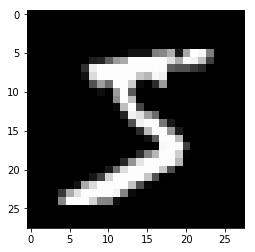

In [13]:
plt.imshow(train_data[0][0].reshape((28,28)),cmap="gray")

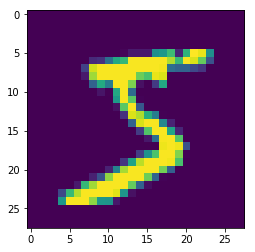

In [14]:
plt.imshow(train_data[0][0].reshape((28,28)))

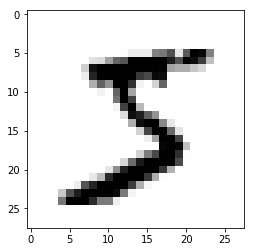

In [15]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gist_yarg");

### Batch loading with DataLoader


Our training set contains 60,000 records. If we look ahead to our model we have 784 incoming features, hidden layers of 120 and 84 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:

(784×120)+120+(120×84)+84+(84×10)+1094080+120+10080+84+840+10==105,214 

For this reason it makes sense to load training data in batches using DataLoader.

In [16]:
torch.manual_seed(101)  # for consistent results

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In the cell above, train_data is a PyTorch Dataset object (an object that supports data loading and sampling).
The batch_size is the number of records to be processed at a time. If it's not evenly divisible into the dataset, then the final batch contains the remainder.
Setting shuffle to True means that the dataset will be shuffled after each epoch.

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

# View a batch of images

Once we've defined a DataLoader, we can create a grid of images using torchvision.utils.make_grid

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


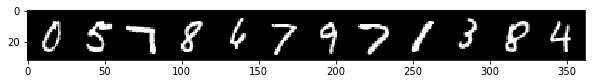

In [17]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8

plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [18]:
images.shape

torch.Size([100, 1, 28, 28])

In [19]:
labels[:12].numpy()

array([   0,    5,    7,    8,    6,    7,    9,    7,    1,    3,    8,
          4], dtype=int64)

# Define the model¶
For this exercise we'll use fully connected layers to develop a multilayer perceptron.
Our input size is 784 once we flatten the incoming 28x28 tensors.
Our output size represents the 10 possible digits.
We'll set our hidden layers to [120, 84] for now. Once you've completed the exercise feel free to come back and try different values.

In [20]:
#784-->120-->84-->10

In [21]:
# # Build a feed-forward network
# model = nn.Sequential(nn.Linear(784, 120),
#                       nn.ReLU(),
#                       nn.Linear(120, 84),
#                       nn.ReLU(),
#                       nn.Linear(84, 10))

# # Define the loss
# criterion = nn.CrossEntropyLoss()

# # Get our data
# images, labels = next(iter(train_loader))
# # Flatten images
# images = images.view(images.shape[0], -1)

# # Forward pass, get our logits
# logits = model(images)
# # Calculate the loss with the logits and the labels
# loss = criterion(logits, labels)

# print(loss)

In my experience it's more convenient to build the model with a log-softmax output using nn.LogSoftmax or F.log_softmax (documentation). Then you can get the actual probabilites by taking the exponential torch.exp(output). With a log-softmax output, you want to use the negative log likelihood loss, nn.NLLLoss

In [22]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 120),
                      nn.ReLU(),
                      nn.Linear(120, 84),
                      nn.ReLU(),
                      nn.Linear(84, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(train_loader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)

# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3112, grad_fn=<NllLossBackward>)


In [23]:
model[4].bias.shape

torch.Size([10])

In [24]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [25]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

Now we know how to use all the individual parts so it's time to see how they work together. 

Let's consider just one learning step before looping through all the data. The general process with PyTorch:

Make a forward pass through the network

Use the network output to calculate the loss

Perform a backward pass through the network with loss.backward() to calculate the gradients

Take a step with the optimizer to update the weights

Below I'll go through one training step and print out the weights and gradients so you can see how it changes. 

Note that I have a line of code optimizer.zero_grad(). 
When you do multiple backwards passes with the same parameters, the gradients are accumulated. 
This means that you need to zero the gradients on each training pass or you'll retain gradients from previous training batches.

In [26]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(train_loader))
images.resize_(100, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0260,  0.0154,  0.0205,  ...,  0.0101,  0.0198, -0.0320],
        [ 0.0032,  0.0103, -0.0285,  ..., -0.0140,  0.0196,  0.0321],
        [-0.0282, -0.0157,  0.0087,  ..., -0.0161,  0.0207, -0.0023],
        ...,
        [-0.0072, -0.0336,  0.0029,  ..., -0.0239,  0.0234, -0.0107],
        [ 0.0148,  0.0316, -0.0288,  ...,  0.0119,  0.0249, -0.0191],
        [-0.0297,  0.0352,  0.0035,  ...,  0.0206, -0.0135,  0.0048]],
       requires_grad=True)
Gradient - tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [27]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0260,  0.0154,  0.0205,  ...,  0.0101,  0.0198, -0.0320],
        [ 0.0032,  0.0103, -0.0285,  ..., -0.0140,  0.0196,  0.0321],
        [-0.0282, -0.0157,  0.0087,  ..., -0.0161,  0.0207, -0.0023],
        ...,
        [-0.0072, -0.0336,  0.0029,  ..., -0.0239,  0.0234, -0.0107],
        [ 0.0148,  0.0316, -0.0288,  ...,  0.0119,  0.0249, -0.0191],
        [-0.0297,  0.0352,  0.0035,  ...,  0.0206, -0.0135,  0.0048]],
       requires_grad=True)


In [28]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(train_loader)}")

Training loss: 2.283323671023051
Training loss: 2.1934079460302986
Training loss: 1.9608661856253942
Training loss: 1.4956695620218914
Training loss: 1.030411925315857
